# Bank Customer Churn Analysis

RowNumber- Index or serial number of the record

CustomerId- Unique identifier assigned to each customer.

Surname- Customer’s last name

CreditScore- Customer’s credit score (ranges typically between 300 and 850).

Geography- Country/region where the customer resides (e.g., France, Germany, Spain).

Gender- Gender of the customer (Male/Female).

Age- Customer’s age in years.

Tenure- Number of years the customer has been with the bank.

Balance- Current account balance of the customer (in monetary units).

NumOfProducts- Number of bank products the customer uses (e.g., credit card, loan, etc.).

HasCrCard- Whether the customer owns a credit card (1 = Yes, 0 = No).

IsActiveMember- Whether the customer is considered an active account holder (1 = Active, 0 = Not).

EstimatedSalary- Estimated annual salary of the customer.

Exited- Target variable – indicates whether the customer has churned (1 = Yes, 0 = No).

# Import Libraries

In [3]:
import pandas as pd

In [4]:
p = pd.read_csv("Customer-Churn-Records.csv")

In [93]:
p

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,AgeGroup,ProductGroup
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,Middle Age (31-50),Single Product
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,Middle Age (31-50),Single Product
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,Middle Age (31-50),Multiple Products
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,Middle Age (31-50),Multiple Products
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,Middle Age (31-50),Single Product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300,Middle Age (31-50),Multiple Products
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771,Middle Age (31-50),Single Product
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564,Middle Age (31-50),Single Product
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339,Middle Age (31-50),Multiple Products


In [6]:
#Q11

# Cheking missing values

In [7]:
print("\nNull values in each column:")
null = (p.isnull().sum())
null


Null values in each column:


RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [8]:
p.duplicated().sum()

0

In [9]:
#Q12

# Nom of rows and columns

In [10]:
p.shape

(10000, 18)

In [11]:
#Q13

# Count distribution

In [12]:
churn_distribution = p['Exited'].value_counts().reset_index()

In [13]:
churn_distribution

,Exited,count
0,0,7962
1,1,2038


In [14]:
#Q14

## Distribution of EstimatedSalary of churned and retained Customers

In [15]:
churned = p[p['Exited'] == 1]['EstimatedSalary']
retained = p[p['Exited'] == 0]['EstimatedSalary']

In [16]:
churned


0       101348.88
2       113931.57
5       149756.71
7       119346.88
16        5097.67
          ...    
9981     53445.17
9982    115146.40
9991     69384.71
9997     42085.58
9998     92888.52
Name: EstimatedSalary, Length: 2038, dtype: float64

In [17]:
retained

1       112542.58
3        93826.63
4        79084.10
6        10062.80
8        74940.50
          ...    
9993     29179.52
9994    167773.55
9995     96270.64
9996    101699.77
9999     38190.78
Name: EstimatedSalary, Length: 7962, dtype: float64

In [18]:
#Distribution= p.groupby('Exited')['EstimatedSalary'].mean() 

In [19]:
#Q15

# Churn rate by Gender

In [20]:
churn_by_Gender = p.groupby('Gender')['Exited'].mean().reset_index()
churn_by_Gender.rename(columns={'Exited': 'ChurnRate'}, inplace=True)

In [21]:
churn_by_Gender

,Gender,ChurnRate
0,Female,0.250715
1,Male,0.164743


# Churn rate by geography

In [22]:
churn_by_geography = p.groupby('Geography')['Exited'].mean().reset_index()
churn_by_geography.rename(columns={'Exited': 'ChurnRate'}, inplace=True)

In [23]:
churn_by_geography

,Geography,ChurnRate
0,France,0.161747
1,Germany,0.324432
2,Spain,0.166734


# Churn rate by IsActiveMember

In [24]:
#Churn rate by IsActiveMember
churn_by_IsActiveMember = p.groupby('IsActiveMember')['Exited'].mean().reset_index()
churn_by_IsActiveMember.rename(columns={'Exited': 'ChurnRate'}, inplace=True)

In [25]:
churn_by_IsActiveMember

,IsActiveMember,ChurnRate
0,0,0.268715
1,1,0.142691


In [26]:
#churn_rate_geo = p.groupby('Geography')['Exited'].mean() * 100

In [27]:
#Q16

# Group by churn status (Exited) and calculate mean values

In [28]:
avg_metrics = p.groupby('Exited')[['CreditScore', 'Balance', 'EstimatedSalary']].mean().reset_index()

In [29]:
avg_metrics

,Exited,CreditScore,Balance,EstimatedSalary
0,0,651.837855,72742.750663,99726.853141
1,1,645.414622,91109.476006,101509.908783


In [30]:
#Q17

## How does Age impact churn? Plot histograms and boxplots for churned and non-churned groups

# Import matplotib

In [31]:
import matplotlib.pyplot as plt

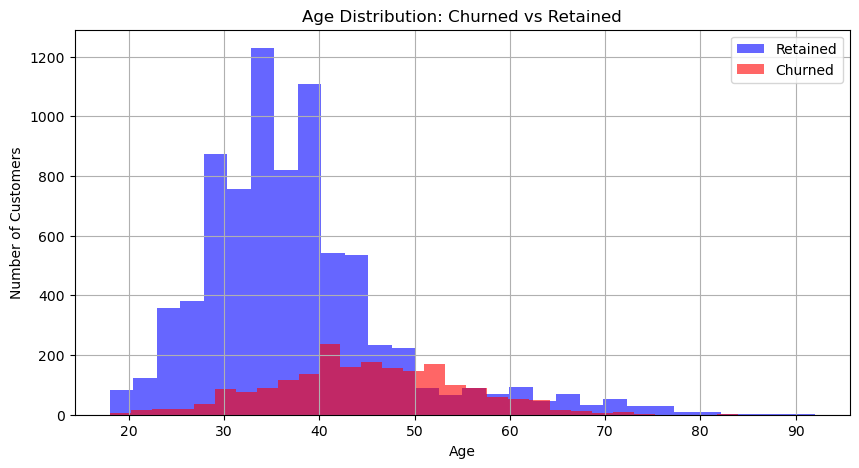

In [32]:
# Create separate age series
churned_ages = p[p['Exited'] == 1]['Age']
retained_ages = p[p['Exited'] == 0]['Age']

# Plot histograms
plt.figure(figsize=(10, 5))
plt.hist(retained_ages, bins=30, alpha=0.6, label='Retained', color='blue')
plt.hist(churned_ages, bins=30, alpha=0.6, label='Churned', color='red')
plt.title('Age Distribution: Churned vs Retained')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.legend()
plt.grid(True)
plt.show()


# Boxplot

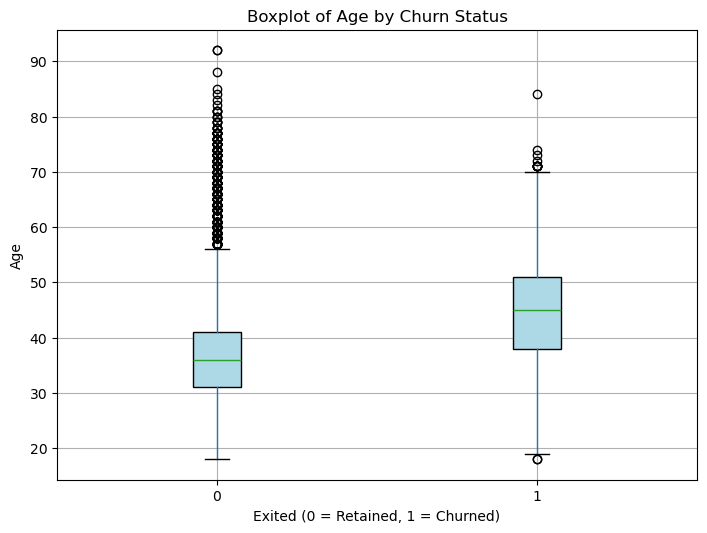

In [33]:
# Boxplot
p.boxplot(column='Age', by='Exited', figsize=(8, 6), grid=True,
           patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot of Age by Churn Status')
plt.suptitle('')  
plt.xlabel('Exited (0 = Retained, 1 = Churned)')
plt.ylabel('Age')
plt.show()

In [34]:
#Q18

### Is there any correlation among numeric features like CreditScore, Balance, and EstimatedSalary?

In [35]:
# Select numeric features of interest
numeric_cols = ['CreditScore', 'Balance', 'EstimatedSalary']

# Compute correlation matrix
correlation_matrix = p[numeric_cols].corr(numeric_only=True)


In [36]:
correlation_matrix

,CreditScore,Balance,EstimatedSalary
CreditScore,1.000000,0.006268,-0.001384
Balance,0.006268,1.000000,0.012797
EstimatedSalary,-0.001384,0.012797,1.000000


In [37]:
#Q19

### What does a heatmap reveal about feature interactions with churn?

# Seaborn

In [38]:
import seaborn as sns

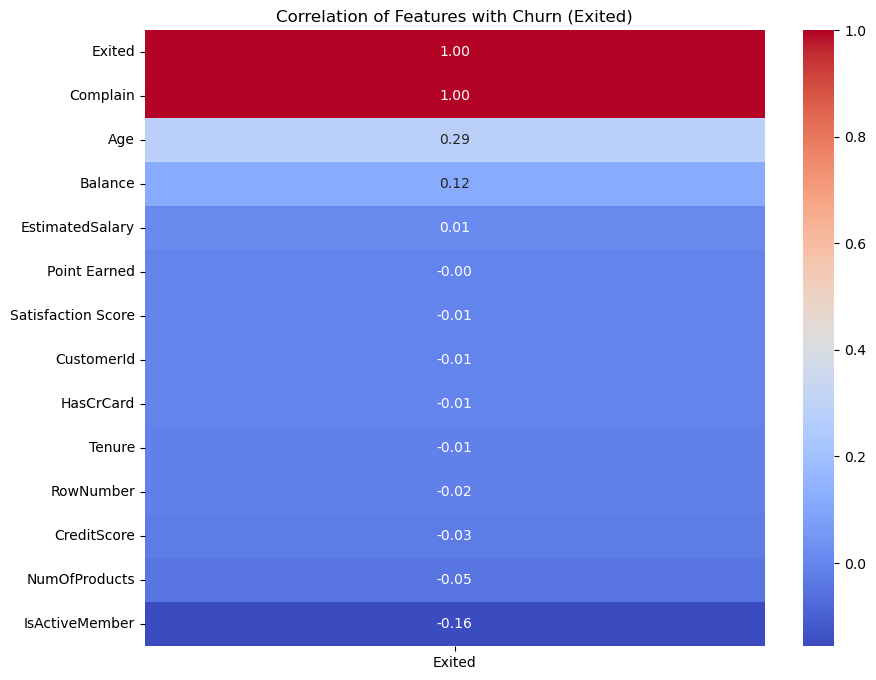

In [39]:
# Select numeric features
numeric_features = p.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_features.corr()

# Plot heatmap (focus on churn column)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['Exited']].sort_values(by='Exited', ascending=False), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Features with Churn (Exited)')
plt.show()

In [40]:
#Q20

### Are there outliers in Balance, CreditScore, or Age that are mostly associated with churn?

# Subplots

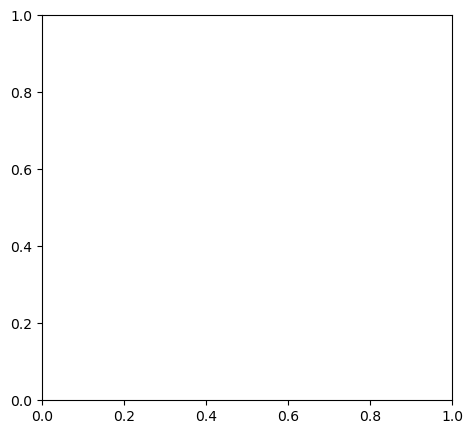

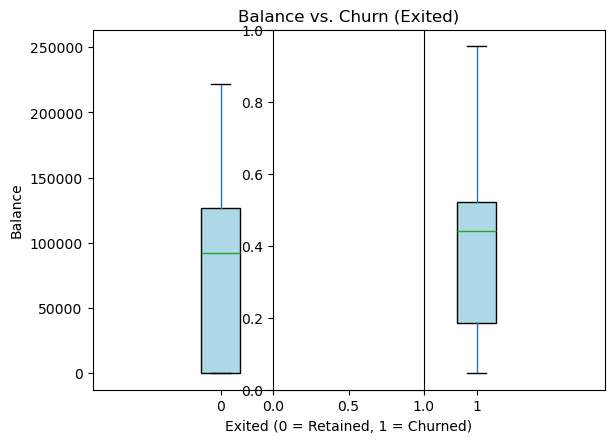

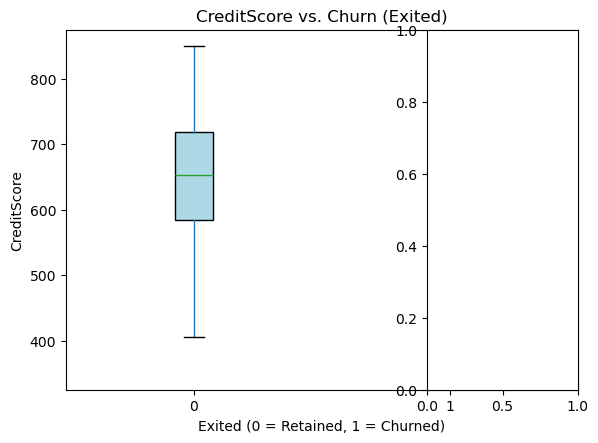

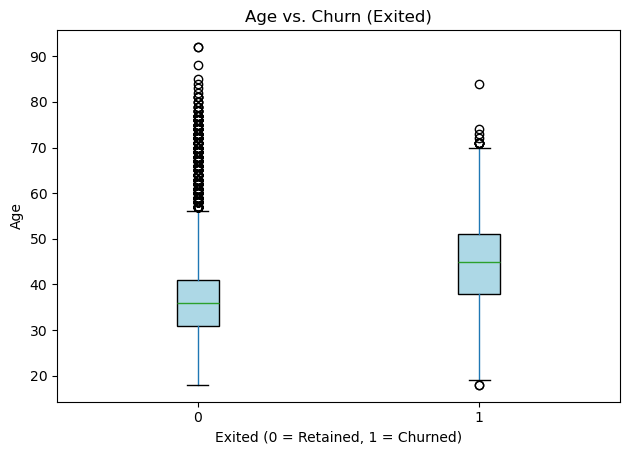

In [41]:
# Set up subplots
features = ['Balance', 'CreditScore', 'Age']
plt.figure(figsize=(18, 5))

# Plot boxplots for each feature vs Exited
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    p.boxplot(column=feature, by='Exited', grid=False, patch_artist=True,
               boxprops=dict(facecolor='lightblue'))
    plt.title(f'{feature} vs. Churn (Exited)')
    plt.suptitle('')
    plt.xlabel('Exited (0 = Retained, 1 = Churned)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

In [42]:
#Q21

#### Group customers into age brackets (e.g.,18-30 as Adults, 30-50 as middle age and 50-100 as seniors.). How does churn rate change across them?

In [43]:
# Define age brackets
bins= [18, 30, 50, 100]
labels = ['Adult (18-30)', 'Middle Age (31-50)', 'Senior (51-100)']

# Create AgeGroup column
p['AgeGroup'] = pd.cut(p['Age'], bins=bins, labels=labels, include_lowest=True)

# Group by AgeGroup and calculate churn rate
churn_by_age_group = p.groupby('AgeGroup')['Exited'].mean().reset_index()

# Convert to percentage
churn_by_age_group['ChurnRate (%)'] = churn_by_age_group['Exited'] * 100

# Drop raw 'Exited' column for clarity
churn_by_age_group = churn_by_age_group[['AgeGroup', 'ChurnRate (%)']]

C:\Users\DELL\AppData\Local\Temp\ipykernel_1292\1914425214.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_age_group = p.groupby('AgeGroup')['Exited'].mean().reset_index()


In [44]:
churn_by_age_group

,AgeGroup,ChurnRate (%)
0,Adult (18-30),7.520325
1,Middle Age (31-50),19.598287
2,Senior (51-100),44.647105


In [45]:
#Q22


### Are customers with only one product (NumOfProducts = 1) more likely to churn than those with multiple?

In [46]:
# Create a new column: 'ProductGroup'
p['ProductGroup'] = p['NumOfProducts'].apply(lambda x: 'Single Product' if x == 1 else 'Multiple Products')

# Calculate churn rate for each group
churn_by_product_group = p.groupby('ProductGroup')['Exited'].mean().reset_index()

# Convert to percentage
churn_by_product_group['ChurnRate (%)'] = churn_by_product_group['Exited'] * 100

# Drop raw 'Exited' column for clarity
churn_by_product_group = churn_by_product_group[['ProductGroup', 'ChurnRate (%)']]

In [47]:
churn_by_product_group

,ProductGroup,ChurnRate (%)
0,Multiple Products,12.794955
1,Single Product,27.714398
